In [1]:
import pandas as pd 
import missingno as msno


poroperm = pd.read_csv('poro_perm_data.csv')

<AxesSubplot:>

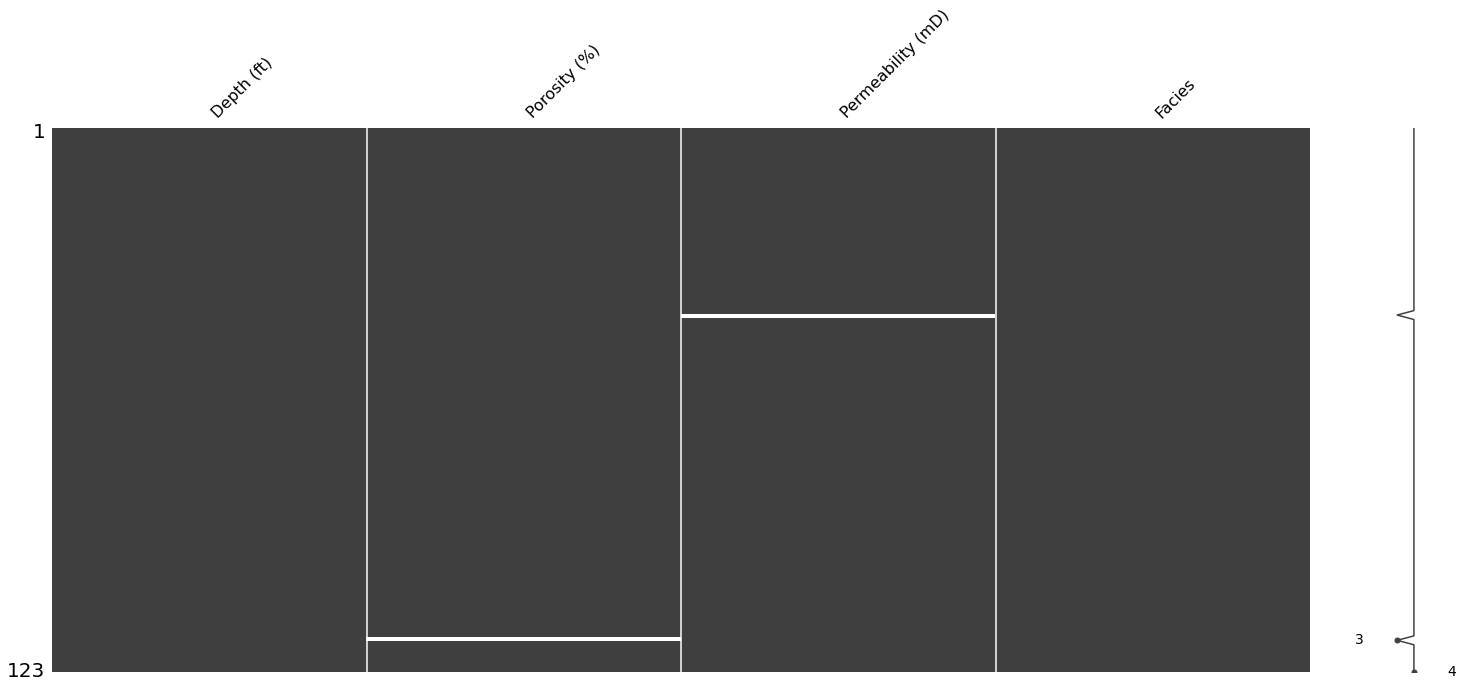

In [2]:
msno.matrix(poroperm)

In [3]:
poroperm.isnull().sum()

Depth (ft)           0
Porosity (%)         1
Permeability (mD)    1
Facies               0
dtype: int64

In [5]:
pp1 = poroperm.copy()
pp1.dropna(axis = 0, inplace = True )
pp1.isnull().sum()

Depth (ft)           0
Porosity (%)         0
Permeability (mD)    0
Facies               0
dtype: int64

<AxesSubplot:>

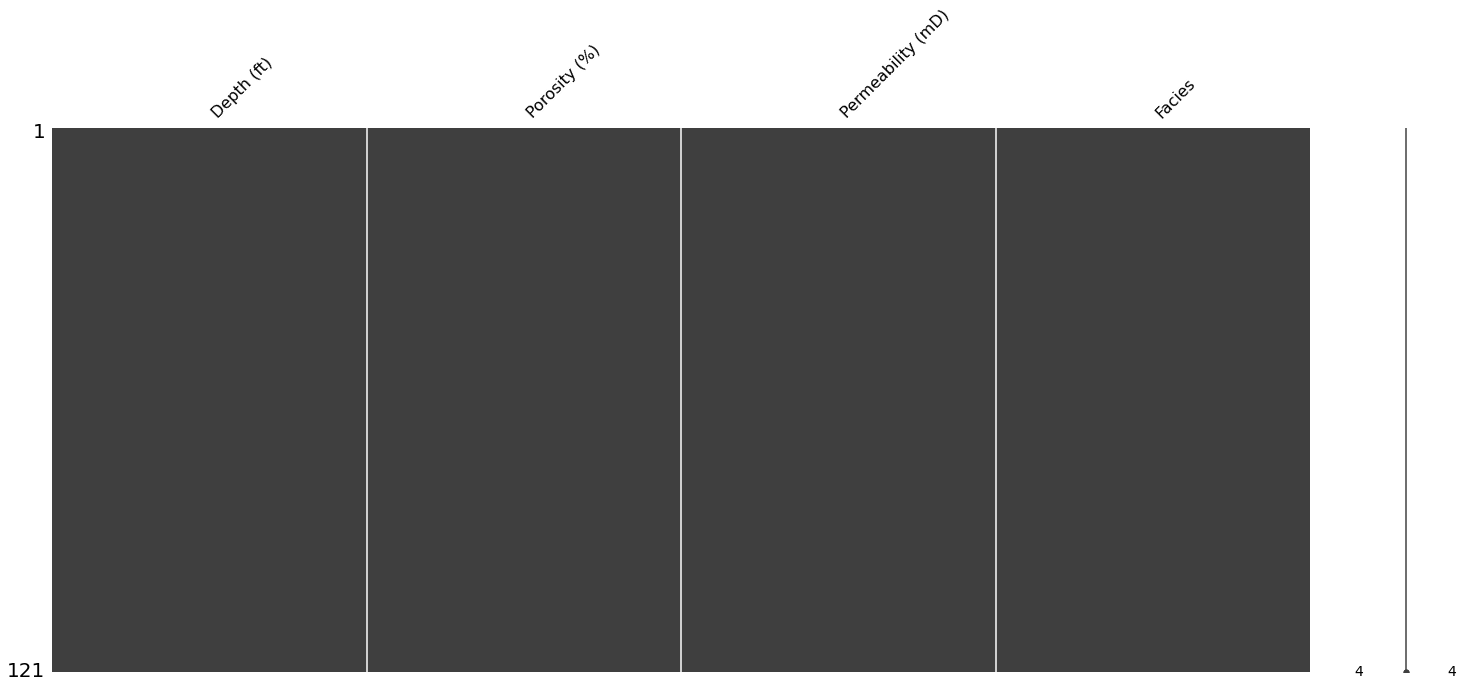

In [7]:
msno.matrix(pp1)

In [8]:
pp1.head()

,Depth (ft),Porosity (%),Permeability (mD),Facies
0,1863.5,14.427556,31.053211,'overbanks'
1,2515.0,16.733522,12.412608,'channel'
2,1608.0,20.211138,95.735554,'crevasse splay'
3,201.0,0.399182,21.324455,'channel'
4,2580.0,14.533879,53.694037,'crevasse splay'


In [11]:
# Removing the inverted commas in the 'Facies' column
pp1['Facies'] = pp1['Facies'].map(lambda x: x.rstrip("'"))
pp1['Facies'] = pp1['Facies'].map(lambda x: x.lstrip("'"))
pp1.head()

,Depth (ft),Porosity (%),Permeability (mD),Facies
0,1863.5,14.427556,31.053211,overbanks
1,2515.0,16.733522,12.412608,channel
2,1608.0,20.211138,95.735554,crevasse splay
3,201.0,0.399182,21.324455,channel
4,2580.0,14.533879,53.694037,crevasse splay


In [15]:
# str.title() makes the first letter capital 
pp1['Facies'] = pp1['Facies'].str.title()
pp1.loc[:,"Facies"].unique()
pp1.head()
pp1.describe()

,Depth (ft),Porosity (%),Permeability (mD)
count,121.000000,121.000000,121.000000
mean,1864.355372,13.837187,39.139021
std,927.172699,6.942884,27.936626
min,201.000000,-1.532720,-34.813937
25%,1279.000000,10.328250,21.324455
50%,2482.500000,12.823499,32.989497
75%,2552.500000,18.100540,47.803553
max,2922.000000,28.163516,113.269795


In [16]:
pp1.drop(pp1[pp1['Porosity (%)'] < 0].index, inplace = True)
pp1.describe()

,Depth (ft),Porosity (%),Permeability (mD)
count,119.000000,119.000000,119.000000
mean,1862.596639,14.095505,39.679606
std,931.359880,6.704431,27.854143
min,201.000000,0.080567,-34.813937
25%,1185.750000,10.343603,22.643846
50%,2482.500000,12.882626,33.029019
75%,2550.500000,18.181287,48.896760
max,2922.000000,28.163516,113.269795


In [21]:
pp1['Permeability (mD)']=pp1['Permeability (mD)'].astype('str')

pp1['Permeability (mD)']=pp1['Permeability (mD)'].str.replace('-','')

pp1['Permeability (mD)']=pp1['Permeability (mD)'].astype('float')

pp1.describe()

,Depth (ft),Porosity (%),Permeability (mD)
count,119.000000,119.000000,119.000000
mean,1862.596639,14.095505,40.264714
std,931.359880,6.704431,26.994088
min,201.000000,0.080567,0.000000
25%,1185.750000,10.343603,23.963237
50%,2482.500000,12.882626,33.029019
75%,2550.500000,18.181287,48.896760
max,2922.000000,28.163516,113.269795


In [24]:
pp1.drop(pp1[pp1['Permeability (mD)'] <= 0].index, inplace = True)
pp1.describe()

,Depth (ft),Porosity (%),Permeability (mD)
count,116.000000,116.000000,116.000000
mean,1860.784483,14.328567,41.306043
std,934.162243,6.626390,26.538701
min,201.000000,0.080567,2.296592
25%,1232.375000,10.760361,25.205635
50%,2487.500000,13.361607,33.968184
75%,2553.750000,18.263966,50.295919
max,2922.000000,28.163516,113.269795


# Second File

In [34]:
import lasio
import numpy as np

In [27]:
las = lasio.read('1051661161.las')

In [28]:
# convert to a data frame
df = las.df()  

In [29]:
df.head()

,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,GR,LSPD,LTEN,...,MCAL,MI,MN,ITT,DT,SPOR,DCAL,RHOB,RHOC,DPOR
DEPT,,,,,,,,,,,,,,,,,,,,,
195.0,0.0,0.0,50.1033,26.8228,34.0239,34.0239,36.6129,67.9772,-59.66,609.5474,...,5.4417,-0.0402,-1.4576,0.0,187.5248,98.9567,4.4815,2.3568,0.0004,20.6567
195.5,0.0,0.0,50.0399,22.3549,30.5510,30.5510,33.0634,66.6325,-59.66,609.0641,...,5.4386,-0.0450,-1.4576,0.0,187.4460,98.9010,4.4861,2.3609,0.0041,20.4146
196.0,0.0,0.0,49.9584,20.3087,29.0076,29.0076,31.5179,70.3524,-59.41,605.4785,...,5.4420,-0.0509,-1.4580,0.0,187.4191,98.8820,4.4849,2.3600,0.0053,20.4690
196.5,0.0,0.0,49.7387,23.4421,31.4152,31.4152,33.9631,72.3127,-59.41,602.3272,...,5.4435,-0.0533,-1.4597,0.0,187.5659,98.9858,4.4806,2.3548,0.0043,20.7699
197.0,0.0,0.0,49.3747,28.0807,35.0576,35.0576,37.5494,66.9943,-59.29,604.2205,...,5.4349,-0.0536,-1.4620,1.0,187.9458,99.2545,4.4776,2.3481,0.0026,21.1618


In [30]:
df.describe()

,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,GR,LSPD,LTEN,...,MCAL,MI,MN,ITT,DT,SPOR,DCAL,RHOB,RHOC,DPOR
count,5541.000000,5541.000000,5540.000000,5466.000000,5466.000000,5466.000000,5467.000000,5452.000000,5541.000000,5541.000000,...,5509.000000,5512.000000,5512.000000,5541.000000,5541.000000,5540.000000,5494.000000,5497.000000,5498.000000,5498.000000
mean,0.012272,0.021115,139.910654,18.085643,25.871001,25.780431,28.638905,226.288636,-68.668264,1102.225995,...,8.144689,12.399068,11.671000,0.078506,95.111759,33.603773,8.274458,38.845337,0.070521,14.762778
std,0.119540,0.155831,92.053635,9.482882,11.012485,9.751341,8.460903,3578.021831,21.135791,239.228427,...,1.625604,16.065711,17.501263,0.292151,23.985427,16.963060,3.818390,1907.225020,0.077172,9.044476
min,0.000000,0.000000,0.000000,-10.381000,-27.299300,-41.596500,-11.857700,-58.279600,-92.380000,602.327200,...,-65.767800,-1.594000,-1.891200,0.000000,-2.492400,-35.426000,4.473900,-2.556100,-3.184200,-82.064400
25%,0.000000,0.000000,78.501300,11.179700,20.364025,20.364025,23.832050,67.104700,-85.370000,898.337000,...,8.010900,4.126400,2.798975,0.000000,80.095700,22.989725,7.998800,2.385200,0.040800,8.676750
50%,0.000000,0.000000,118.398800,19.443600,28.286950,28.280950,30.826900,101.855900,-77.990000,1120.542400,...,8.133300,7.358100,5.537800,0.000000,96.999000,34.937400,8.123650,2.464800,0.059700,14.353900
75%,0.000000,0.000000,183.443200,24.192075,32.062125,32.052275,34.632600,124.645475,-37.020000,1322.002300,...,8.362700,11.108925,10.935250,0.000000,108.288300,42.920950,8.350400,2.562000,0.088400,18.975050
max,2.000000,2.000000,674.211400,200.707200,400.581900,250.748200,51.426600,100000.000000,-1.720000,1520.791500,...,12.344800,142.340500,164.806500,2.000000,238.234000,134.819000,173.585200,100000.000000,0.270500,158.479500


<AxesSubplot:>

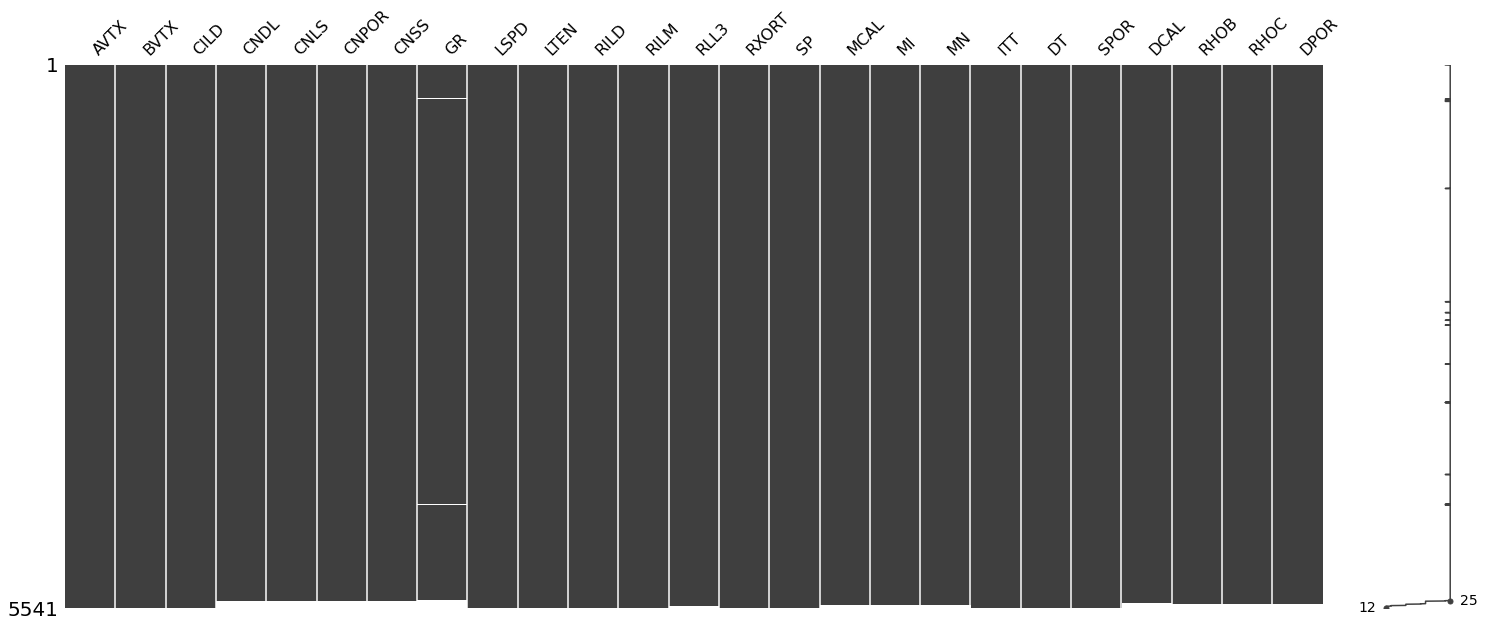

In [31]:
msno.matrix(df)

In [32]:
df.isnull().sum()

AVTX      0
BVTX      0
CILD      1
CNDL     75
CNLS     75
CNPOR    75
CNSS     74
GR       89
LSPD      0
LTEN      0
RILD      0
RILM      4
RLL3     22
RXORT     0
SP        0
MCAL     32
MI       29
MN       29
ITT       0
DT        0
SPOR      1
DCAL     47
RHOB     44
RHOC     43
DPOR     43
dtype: int64

In [35]:
df1 = df.copy()
df1['CILD'] = df1['CILD'].replace(np.nan, df1['CILD'].mean(), regex = True)
df1['CNDL'] = df1['CNDL'].replace(np.nan, df1['CNDL'].mean(), regex = True)
df1['CNLS'] = df1['CNLS'].replace(np.nan, df1['CNLS'].mean(), regex = True)
df1['CNPOR'] = df1['CNPOR'].replace(np.nan, df1['CNPOR'].mean(), regex = True)
df1['CNSS'] = df1['CNSS'].replace(np.nan, df1['CNSS'].mean(), regex = True)
df1['GR'] = df1['GR'].replace(np.nan, df1['GR'].mean(), regex = True)
df1['RILM'] = df1['RILM'].replace(np.nan, df1['RILM'].mean(), regex = True)
df1['RLL3'] = df1['RLL3'].replace(np.nan, df1['RLL3'].mean(), regex = True)
df1['MCAL'] = df1['MCAL'].replace(np.nan, df1['MCAL'].mean(), regex = True)
df1['MI'] = df1['MI'].replace(np.nan, df1['MI'].mean(), regex = True)
df1['MN'] = df1['MN'].replace(np.nan, df1['MN'].mean(), regex = True)
df1['SPOR'] = df1['SPOR'].replace(np.nan, df1['SPOR'].mean(), regex = True)
df1['DCAL'] = df1['DCAL'].replace(np.nan, df1['DCAL'].mean(), regex = True)
df1['RHOB'] = df1['RHOB'].replace(np.nan, df1['RHOB'].mean(), regex = True)
df1['RHOC'] = df1['RHOC'].replace(np.nan, df1['RHOC'].mean(), regex = True)
df1['DPOR'] = df1['DPOR'].replace(np.nan, df1['DPOR'].mean(), regex = True)

In [36]:
df1.isnull().sum()

AVTX     0
BVTX     0
CILD     0
CNDL     0
CNLS     0
CNPOR    0
CNSS     0
GR       0
LSPD     0
LTEN     0
RILD     0
RILM     0
RLL3     0
RXORT    0
SP       0
MCAL     0
MI       0
MN       0
ITT      0
DT       0
SPOR     0
DCAL     0
RHOB     0
RHOC     0
DPOR     0
dtype: int64

<AxesSubplot:>

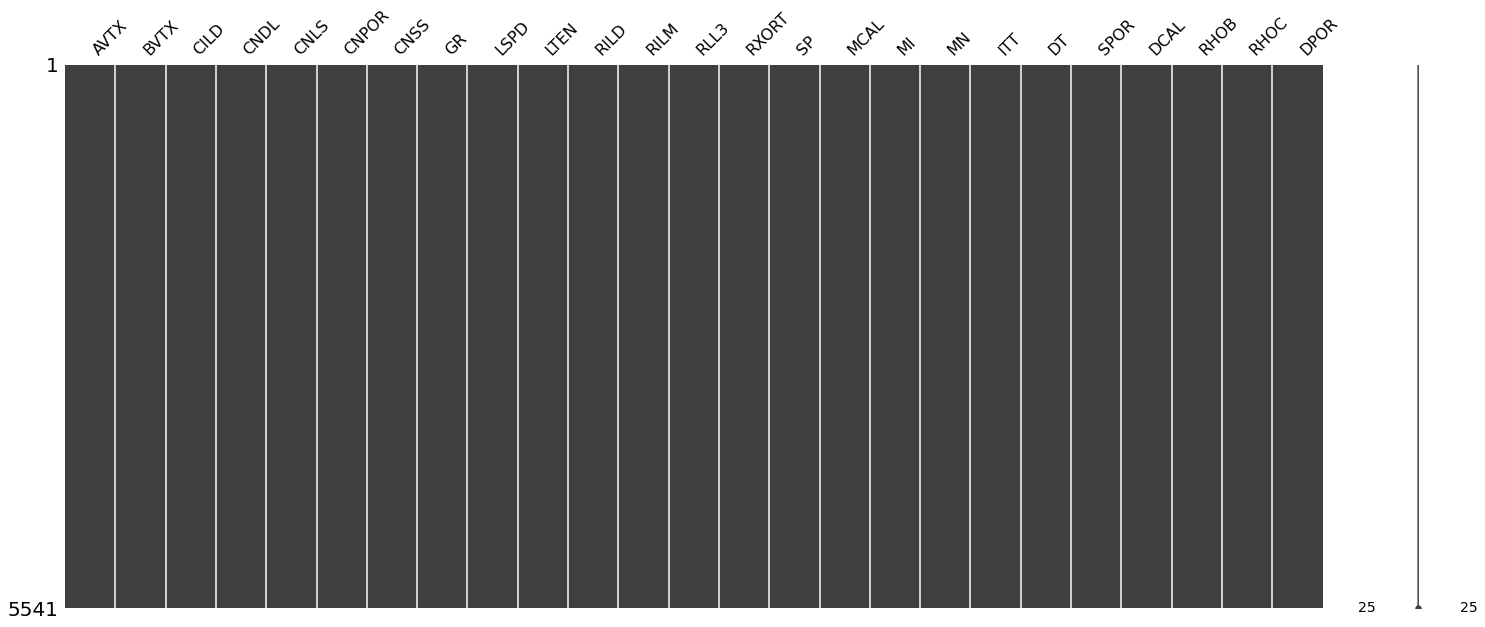

In [38]:
msno.matrix(df1)

In [39]:
df1.describe()

,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,GR,LSPD,LTEN,...,MCAL,MI,MN,ITT,DT,SPOR,DCAL,RHOB,RHOC,DPOR
count,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,...,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000
mean,0.012272,0.021115,139.910654,18.085643,25.871001,25.780431,28.638905,226.288636,-68.668264,1102.225995,...,8.144689,12.399068,11.671000,0.078506,95.111759,33.603773,8.274458,38.845337,0.070521,14.762778
std,0.119540,0.155831,92.045326,9.418474,10.937688,9.685110,8.404205,3549.165037,21.135791,239.228427,...,1.620902,16.023607,17.455396,0.292151,23.985427,16.961529,3.802158,1899.636104,0.076872,9.009308
min,0.000000,0.000000,0.000000,-10.381000,-27.299300,-41.596500,-11.857700,-58.279600,-92.380000,602.327200,...,-65.767800,-1.594000,-1.891200,0.000000,-2.492400,-35.426000,4.473900,-2.556100,-3.184200,-82.064400
25%,0.000000,0.000000,78.504700,11.360200,20.599900,20.599900,24.041200,67.864400,-85.370000,898.337000,...,8.011400,4.146300,2.808700,0.000000,80.095700,22.992500,7.999500,2.385700,0.040900,8.721500
50%,0.000000,0.000000,118.399300,19.313100,28.182200,28.176400,30.726600,102.631700,-77.990000,1120.542400,...,8.134900,7.374400,5.578600,0.000000,96.999000,34.935700,8.128200,2.466500,0.060000,14.400400
75%,0.000000,0.000000,183.430200,24.087600,31.991300,31.981600,34.557400,125.749300,-37.020000,1322.002300,...,8.361000,11.265500,11.106400,0.000000,108.288300,42.919600,8.348400,2.564200,0.088100,18.947200
max,2.000000,2.000000,674.211400,200.707200,400.581900,250.748200,51.426600,100000.000000,-1.720000,1520.791500,...,12.344800,142.340500,164.806500,2.000000,238.234000,134.819000,173.585200,100000.000000,0.270500,158.479500


In [42]:
df1.drop(df1[df1['GR'] >= 100000].index, inplace = True)
df1.describe()

,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,GR,LSPD,LTEN,...,MCAL,MI,MN,ITT,DT,SPOR,DCAL,RHOB,RHOC,DPOR
count,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,...,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.00000,5534.000000,5534.000000
mean,0.012288,0.021142,139.851069,18.078872,25.864172,25.773488,28.632297,100.084086,-68.650582,1102.345144,...,8.144557,12.406109,11.677801,0.078424,95.090599,33.588812,8.274380,38.89147,0.070527,14.756643
std,0.119615,0.155928,92.066794,9.421396,10.942292,9.688558,8.406711,49.053591,21.142532,239.278611,...,1.621904,16.031019,17.464182,0.292061,23.981968,16.959084,3.804545,1900.83693,0.076906,9.012396
min,0.000000,0.000000,0.000000,-10.381000,-27.299300,-41.596500,-11.857700,-58.279600,-92.380000,602.327200,...,-65.767800,-1.594000,-1.891200,0.000000,-2.492400,-35.426000,4.473900,-2.55610,-3.184200,-82.064400
25%,0.000000,0.000000,78.475725,11.355875,20.589125,20.589125,24.036300,67.743975,-85.370000,898.573600,...,8.011325,4.153725,2.810700,0.000000,80.082125,22.975025,7.999400,2.38585,0.040900,8.706950
50%,0.000000,0.000000,118.317200,19.297950,28.173000,28.161100,30.714750,102.524050,-77.990000,1120.809350,...,8.134700,7.375300,5.580700,0.000000,97.001450,34.937400,8.128250,2.46675,0.060000,14.392600
75%,0.000000,0.000000,183.403350,24.072725,31.980825,31.977625,34.551700,125.642525,-37.020000,1322.141650,...,8.361000,11.273525,11.104950,0.000000,108.275175,42.910275,8.348275,2.56430,0.088100,18.935225
max,2.000000,2.000000,674.211400,200.707200,400.581900,250.748200,51.426600,560.444800,-1.720000,1520.791500,...,12.344800,142.340500,164.806500,2.000000,238.234000,134.819000,173.585200,100000.00000,0.270500,158.479500


In [46]:
df1.drop(df1[df1['RHOB'] >= 100000].index, inplace = True)
df1.describe()
df1.head()

,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,GR,LSPD,LTEN,...,MCAL,MI,MN,ITT,DT,SPOR,DCAL,RHOB,RHOC,DPOR
DEPT,,,,,,,,,,,,,,,,,,,,,
195.0,0.0,0.0,50.1033,26.8228,34.0239,34.0239,36.6129,67.9772,-59.66,609.5474,...,5.4417,-0.0402,-1.4576,0.0,187.5248,98.9567,4.4815,2.3568,0.0004,20.6567
195.5,0.0,0.0,50.0399,22.3549,30.5510,30.5510,33.0634,66.6325,-59.66,609.0641,...,5.4386,-0.0450,-1.4576,0.0,187.4460,98.9010,4.4861,2.3609,0.0041,20.4146
196.0,0.0,0.0,49.9584,20.3087,29.0076,29.0076,31.5179,70.3524,-59.41,605.4785,...,5.4420,-0.0509,-1.4580,0.0,187.4191,98.8820,4.4849,2.3600,0.0053,20.4690
196.5,0.0,0.0,49.7387,23.4421,31.4152,31.4152,33.9631,72.3127,-59.41,602.3272,...,5.4435,-0.0533,-1.4597,0.0,187.5659,98.9858,4.4806,2.3548,0.0043,20.7699
197.0,0.0,0.0,49.3747,28.0807,35.0576,35.0576,37.5494,66.9943,-59.29,604.2205,...,5.4349,-0.0536,-1.4620,1.0,187.9458,99.2545,4.4776,2.3481,0.0026,21.1618


KeyError: 'DEPT'

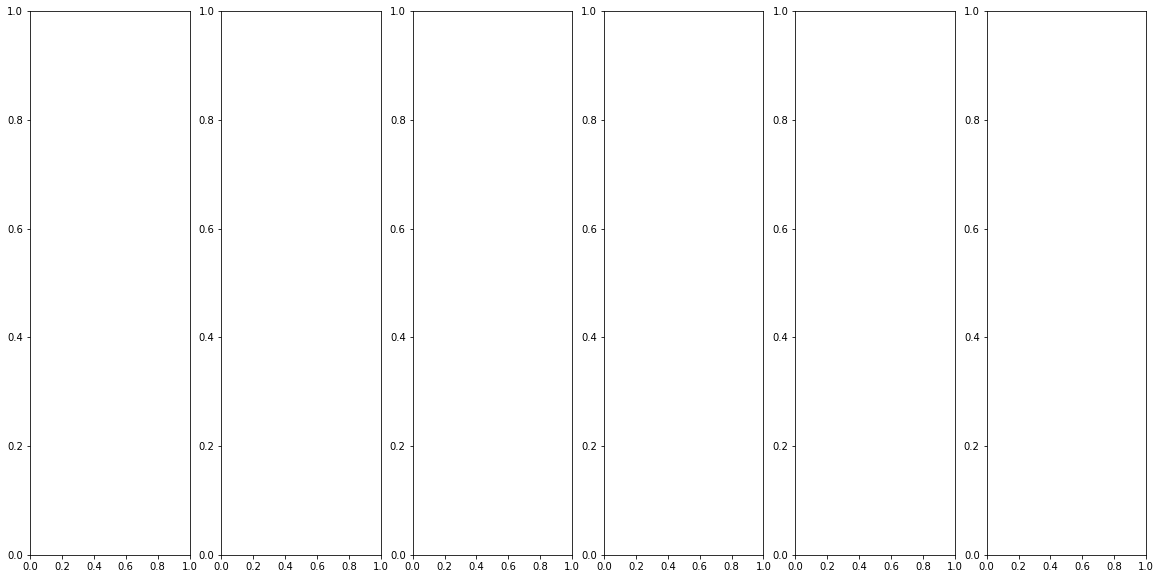

In [47]:
def well_log_display(df, column_depth, column_list, 
                     column_semilog=None, min_depth=None, max_depth=None, 
                     column_min=None, column_max=None, colors=None, 
                     fm_tops=None, fm_depths=None, 
                     tight_layout=1, title_size=10):
  """
  Display log side-by-side style
  Input:
  df is your dataframe
  specify min_depth and max_depth as the upper and lower depth limit
  column_depth is the column name of your depth
  column_list is the LIST of column names that you will display
  column_semilog is specific for resistivity column; if your resistivities are 
    in column 3, specify as: column_semilog=2. Default is None, so if you don't 
    specify, the resistivity will be plotted in normal axis instead
    
  column_min is list of minimum values for the x-axes.
  column_max is list of maximum values for the x-axes.
  
  colors is the list of colors specified for each log names. Default is None,
    so if don't specify, the colors will be Matplotlib default (blue)
  fm_tops and fm_depths are the list of formation top names and depths.
    Default is None, so no tops are shown. Specify both lists, if you want
    to show the tops
  """
  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  import random

  if column_semilog==None:
    # column semilog not defined, RT will be plotted in normal axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])       
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)           
        ax[i].invert_yaxis()    


  else:
    # column semilog is defined, RT will be plotted in semilog axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        if i == column_semilog:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth])
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])        
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        if i == column_semilog:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth], color=colors[i])     
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')  
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])   
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)
        ax[i].invert_yaxis() 

  if fm_tops!=None and fm_depths!=None:
    # Formation tops and depths are specified, they will be shown

    # produce colors
    rgb = []
    for j in range(len(fm_tops)):
      _ = (random.random(), random.random(), random.random())
      rgb.append(_)

    for i in range(len(logs)):
      for j in range(len(fm_tops)):
        # rgb = (random.random(), random.random(), random.random())
        ax[i].axhline(y=fm_depths[j], linestyle=":", c=rgb[j], label=fm_tops[j])  
        # y = fm_depths[j] / (max_depth - min_depth)    
        # ax[i].text(0.5, y, fm_tops[j], fontsize=5, va='center', ha='center', backgroundcolor='w')

  # plt.legend()
  # plt.legend(loc='upper center', bbox_to_anchor=(-3, -0.05),
  #            fancybox=True, shadow=True, ncol=5)  
  
  plt.show() 


column_depth = 'DEPT'
column_list = ['DPOR', 'RILM', 'RILD', 'GR', 'CNPOR', 'RHOB']
column_semilog = 6
column_min=None
column_max=None
min_depth= 0
max_depth= 4000
colors=["black","blue", "orange", "red","grey","green","yellow"]
well_log_display(df1, column_depth, column_list, column_semilog, min_depth, max_depth, column_min, column_max, colors)